In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
plt.rcParams['figure.figsize'] = [14, 7]

C:\Users\Gianlorenzo\AppData\Local\Temp\ipykernel_5432\750606652.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Sample 100 points with a mean of 0 and a std of 1. This is a standard normal distribution
X = np.random.normal(0, 1, 100)

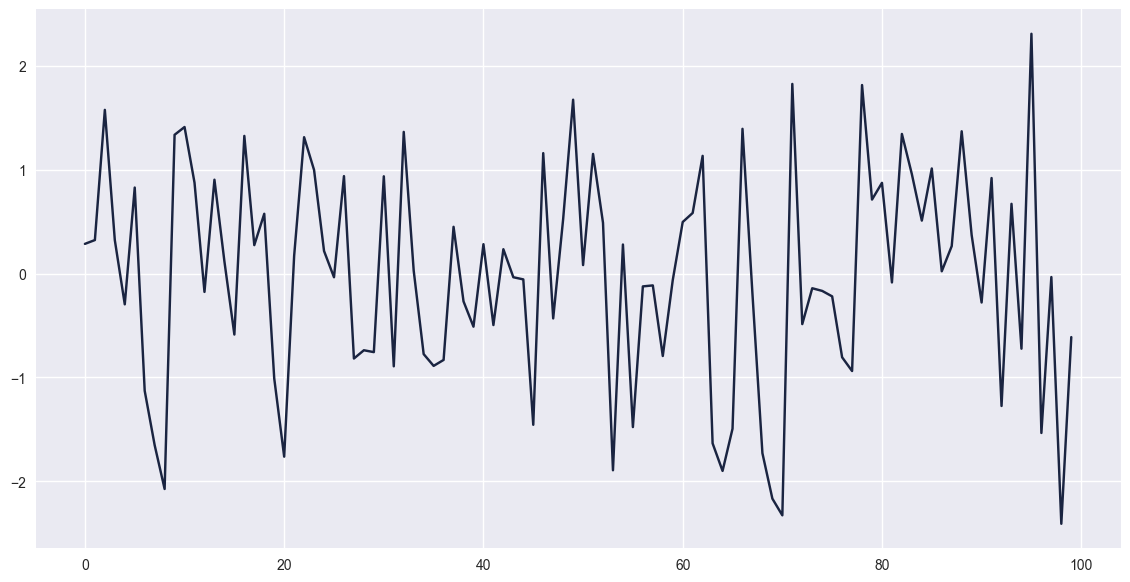

In [3]:
plt.plot(X)

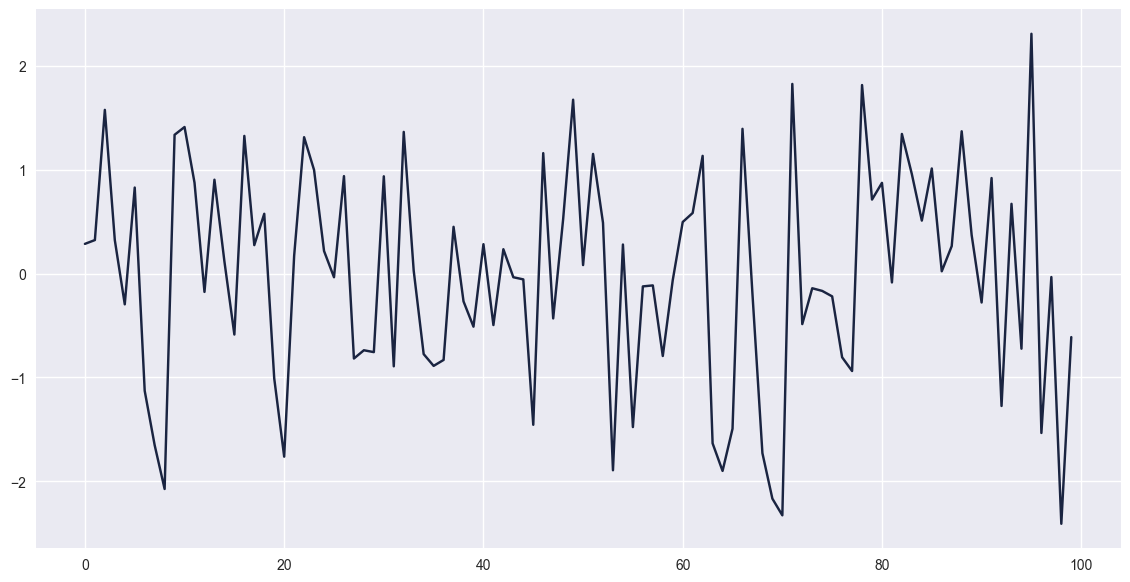

In [4]:
# ; does not print the returned object of the last string
plt.plot(X);

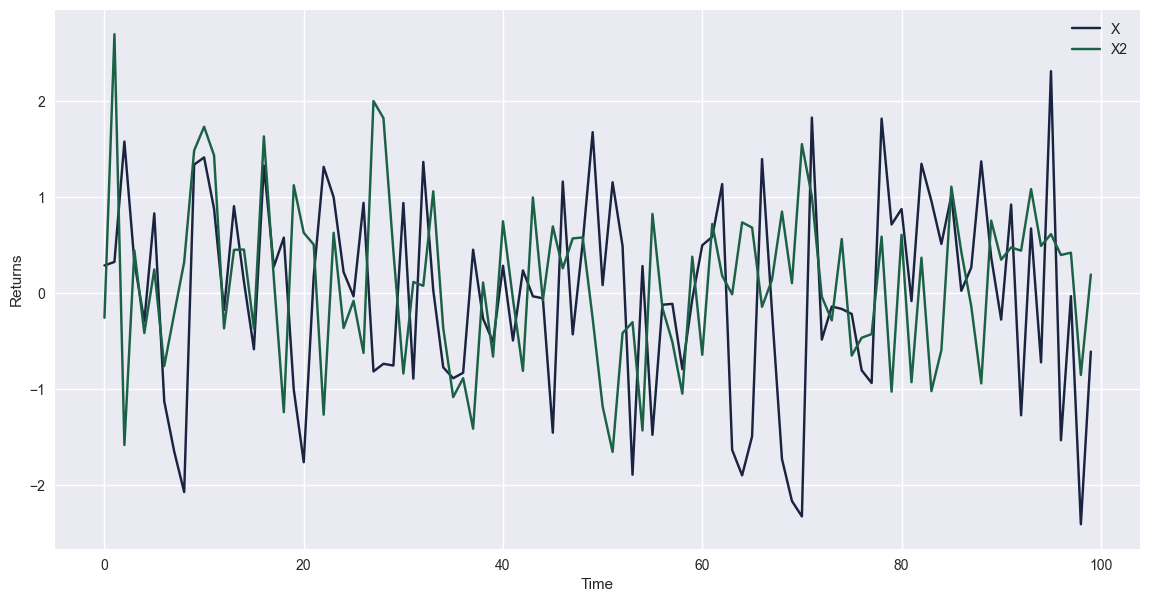

In [5]:
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

In [6]:
np.mean(X)

-0.022529096956766925

In [7]:
np.std(X)

1.0454642740674163

## Getting Real Pricing Data

In [8]:
start_date = datetime(2012, 1, 1)
end_date = datetime(2015, 6, 1)

data = yf.download('MSFT', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.366360,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.869194,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.092669,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.435867,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.140560,59706800
...,...,...,...,...,...,...
2015-05-22,47.299999,47.349998,46.820000,46.900002,41.298897,25720600
2015-05-26,46.830002,46.880001,46.189999,46.590000,41.025917,29581900
2015-05-27,46.820000,47.770000,46.619999,47.610001,41.924095,27335600


In [10]:
X = data['Close']

In [11]:
X

Date
2012-01-03    26.770000
2012-01-04    27.400000
2012-01-05    27.680000
2012-01-06    28.110001
2012-01-09    27.740000
                ...    
2015-05-22    46.900002
2015-05-26    46.590000
2015-05-27    47.610001
2015-05-28    47.450001
2015-05-29    46.860001
Name: Close, Length: 856, dtype: float64

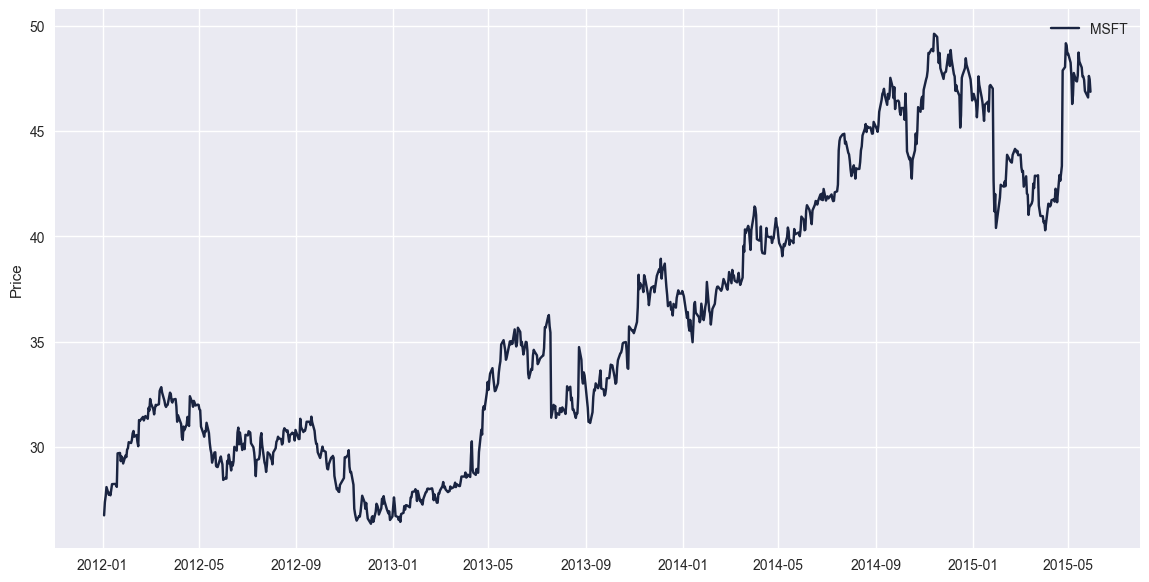

In [20]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

In [13]:
np.mean(X)

36.05204441837061

In [14]:
np.std(X)

6.691260772637948

## Getting Returns from Prices

In [15]:
R = X.pct_change()[1:]

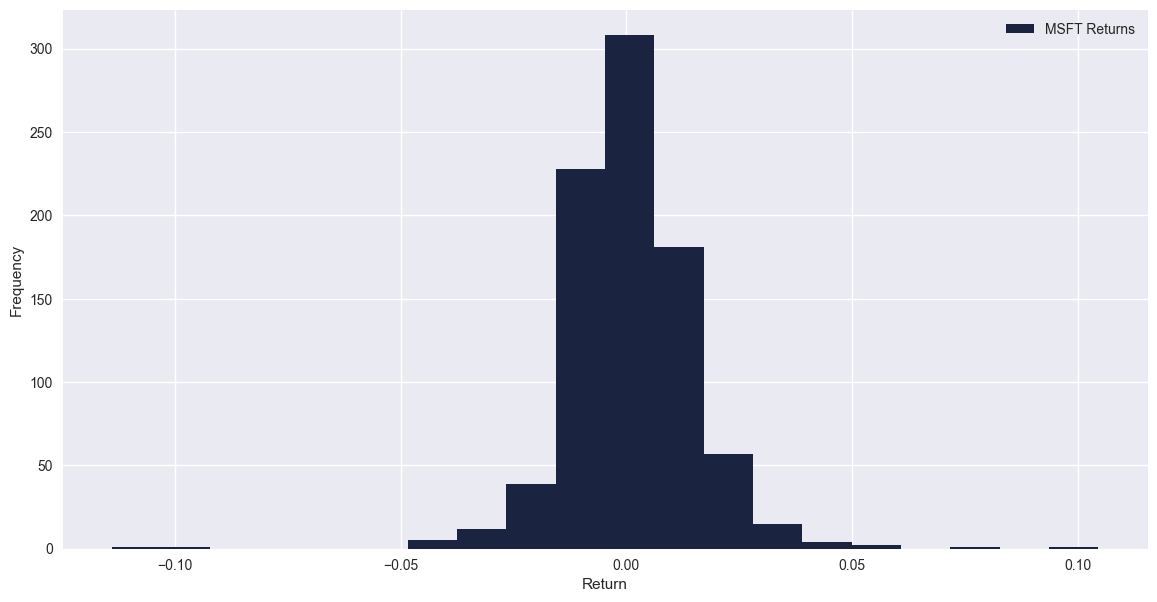

In [21]:
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

In [22]:
np.mean(R)

0.0007593053938455802

In [23]:
np.std(R)

0.014427919863141543

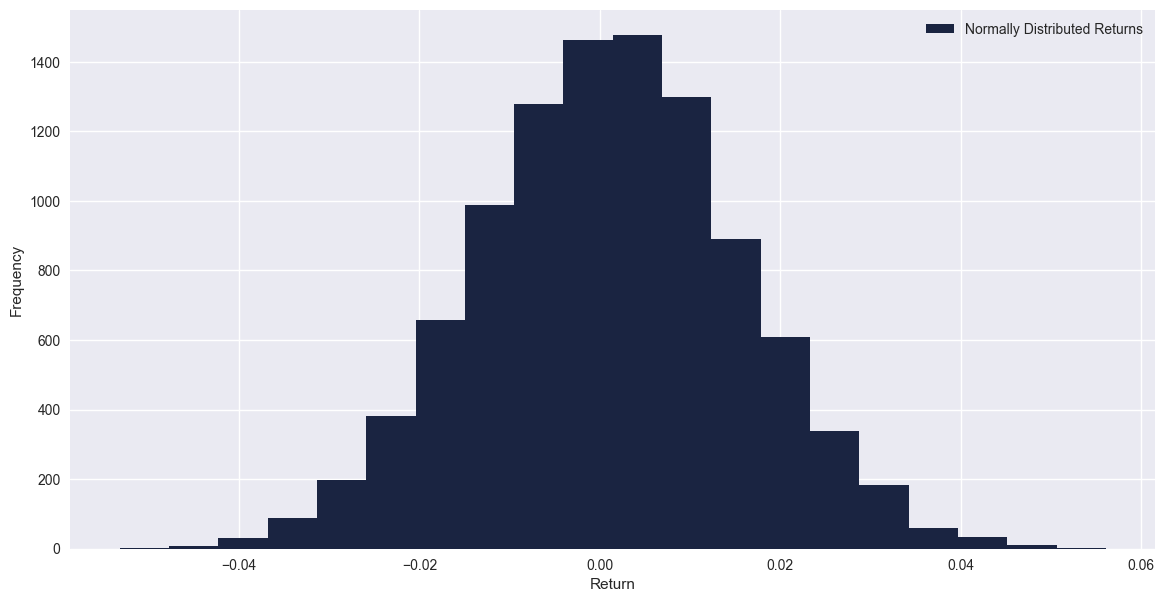

In [24]:
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

## Generating a Moving Average

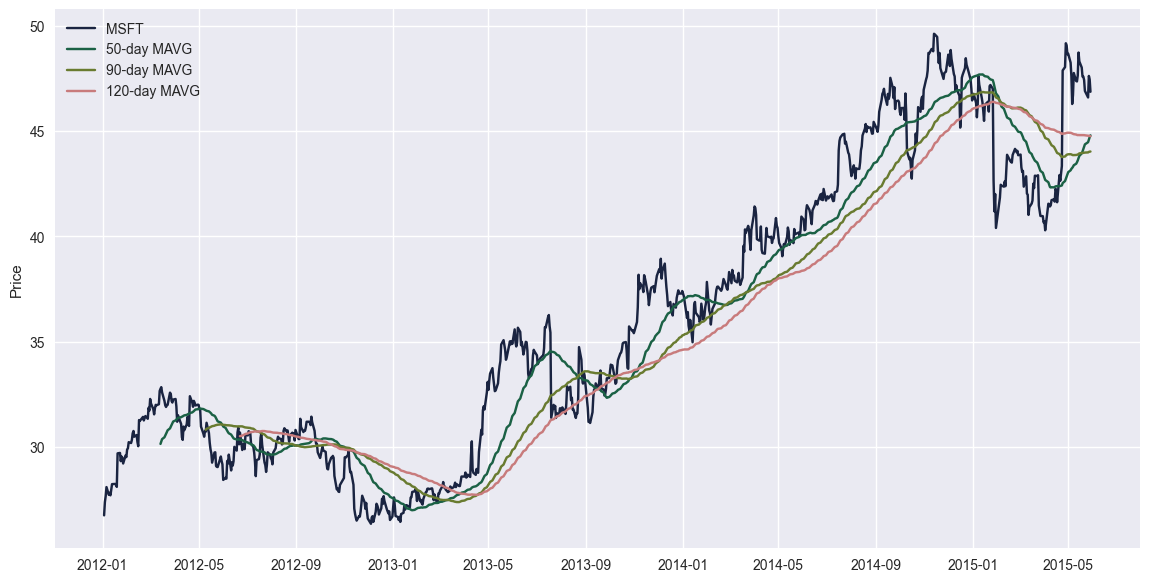

In [35]:
# Take the average of the last 60 days at each timepoint
MAVG = X.rolling(window=50).mean()
MAVG2 = X.rolling(window=90).mean()
MAVG3 = X.rolling(window=120).mean()

plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.plot(MAVG2.index, MAVG2.values)
plt.plot(MAVG3.index, MAVG3.values)
plt.ylabel('Price')
plt.legend(['MSFT', '50-day MAVG', '90-day MAVG', '120-day MAVG']);